**Time-resolved High-precision Data Analysis with HST/WFC3**

Yifan Zhou (UT Austin) and Daniel Apai (U Arizona)

This activity has the following learning goals:
    * Basics of HST/WFC3 data and calibration images
    * Fundamental observing modes: staring, scanning
    * Fitting transits to reduced data
    * Importance of the charge trapping effect
    * Reduced transit spectrum       

**The Hubble Space Telescope and its Wide Field Camera 3**

We will add here a brief description of HST's relevance for time-domain observations, perhaps a photo of the telescopes, and then a few sentences about WFC3 and its fundamental modes.

**Task 1: Basics of HST/WFC3 Data**

In this task we will explore science integrations and calibration data for HST/WFC3. In its commonly used imaging mode HST can take non-dispersed (aks "direct") images of its field of view. In spectrally dispersed mode ...

HST/WFC3 is using a grism to obtain slitless spectra: this means ...




In this task you will match four images taken with WFC3 with their descriptions and purpose.
Inspect the four images carefully.

![](Figures/Task1.pdf)

*Show Images for*
* Staring mode observation of a brown dwarf? (or TRAPPIST-1) with other sources in the field
* Scanning mode slitless spectra for TRAPIST-1
* Direct image of a field 
* Calibration File: sky frame/flat field
* ~Calibration file: bad pixel map / map of cosmic rays?~

*Show labels*

*Show Purposes*
A) Science data for target identification or photometric measurement
B) Science data for high-precision spectrophotometric measurement of bright sources
C) Science data for spectroscopic or spectrophotometric observations of faint sources
D) Calibration data to correct for sensitivity variations across the detector
E) Calibration data identifying unreliable pixels



**Task 2 Interpreting slitless grism image**

In this task we will interpret the slitless spectrum image of a field including the target and bright sources and a spatially scanned specxtr

2a) The image below shows a starfield with a very cool brown dwarf in it. Inspect the image, identify the spatial directions as well as the direction of spectral dispersion. Which direction points toward the shorter wavelengths? Which target may be the brown dwarf and why? 

*2b) Interpreting scanning-mode images*
Inspect the image below. This image is a XXX second long exposure with HST/WFC3 targeting TRAPPIST-1. During the exposure the planet TRAPPIST-1?? began transiting its host star. Although not visible on this image without analysis, the data record this event. Discuss how to interpret this image and how is the transit ingress encoded in it. What do the X/Y directions and pixel intensity correspond to on this image? How could the transit be detected in this image? How could the spectra of the star be derived from the image? How does this image encode the transiting planet's transmission spectrum? 

**Task 3: Charge Trapping Effect Demo**

In this task we will explore the origin and importance of the charge trapping effect and how it impacts raw integrations with HST/WFC3.
Yifan: please include here what you have.

# Charge Trapping and Ramp effect in HST/WFC3

Following is a demonstration of RECTE, a physically-motivated model for the charge trapping/ramp effect. 

Ramp effect is the most prominent systematics for WFC3/IR detector (as well as other HgCdTe based detectors) in the time-series observation mode. It appears as an exponential ($\sim1-\exp(-t)$) shaped light curve. The typcial amplitude for the ramp is on the order of 1% in the first orbit and reduces to less than 0.5% for the subsequent orbit. Ramp effect systematics removal is critical for accurately measuring transit depths and spectra for transitting exoplanets

In Zhou et al. (2017), we consider the charge trapping processes in the WFC3/IR detector and created RECTE. The essense of RECTE is that a fraction of stmulated charges (by incoming radiation) are trapped by in the detector rather than being detected due to detector defects.

Following demonstration consists of two parts. The first part is to demonstrate how parameters that descriebe the intrument defects affect the shape of the ramp. The second part is to demonstrate how parameters that related to each observation can affect the ramp profile.

<IPython.core.display.Javascript object>


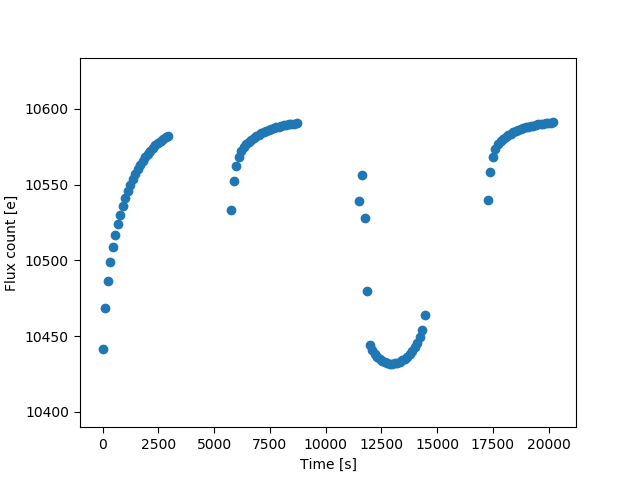

interactive(children=(FloatText(value=1500.0, description='slow N', step=100.0), FloatText(value=0.012, descri…

In [5]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from codes.ramp_demonstration1 import rampModelPlot

%matplotlib notebook


# create interactive widgets
trap_s = widgets.FloatText(min=1000, max=3000, value=1500, step=100,
                           description='slow N')
trap_f = widgets.FloatText(min=50, max=500, value=300, step=50,
                           description='fast N')
eta_s = widgets.FloatText(min=0.005, max=0.02, value=0.012, step=0.001,
                           description='slow eta')
eta_f = widgets.FloatText(min=0.001, max=0.01, value=0.005, step=0.001,
                           description='fast eta')
tau_s = widgets.FloatText(min=6000, max=30000, value=15000, step=2000,
                           description='slow tau')
tau_f = widgets.FloatText(min=50, max=500, value=200, step=50,
                           description='fast tau')

plt.figure()

# make interactive plot
interactive_plot = interactive(rampModelPlot,
                               nTrap_s=trap_s,
                               eta_s=eta_s,
                               tau_s=tau_s,
                               nTrap_f=trap_f,
                               eta_f=eta_f,
                               tau_f=tau_f,
                               continuous_update=False)

# adjust details of the plot
output = interactive_plot.children[-1]
output.layout.height = '350px'
# run the interactive plot
interactive_plot


## Charge Trapping Processes
RECTE model assumes two populations of charge traps. The two populations are distinguished by their typical trapping timescales ($\tau$). The *slow* traps release the trapped charges at a much longer timescales than the *fast* traps ($\tau_\mathrm{s} >> \tau_\mathrm{f}$). For each trap population, the charge trapping processes are controlled by three parameters (the parameter names used in the python script are in the parenthesis):
* The numbers of traps (`nTrap_s, nTrap_f`)
* Trapping efficiencies (`eta_s, eta_f`)
* Trap lifetimes/timescales (`tau_s, tau_f`)

These parameters determines different aspects of the ramp effect profiles. Roughly speaking, given a specific fluence intensity, the numbers of traps determine how fast the ramp rises (fewer traps, faster rising); trapping efficiencies determine the amplitude of the ramp; trap lifetimes determine the difference of the observed fluxe between the end of one orbit and the beginning of the next. Fast traps have stronger effect at the beginning of each orbits. Slow traps have stronger overall effect, especially at the latter part of each orbit.

Following script creates an interactive plot that demonstrate how each model parameter affects the ramp profile. You can adjust these parameters using the widgets under the plot. The output ramp profile will change accordingly. You can also change the `crate` or `exptime` parameter to adjust the fluence rate and exposure time.

**Task 4: Fitting transit model with Charge Trap Correction**

<IPython.core.display.Javascript object>


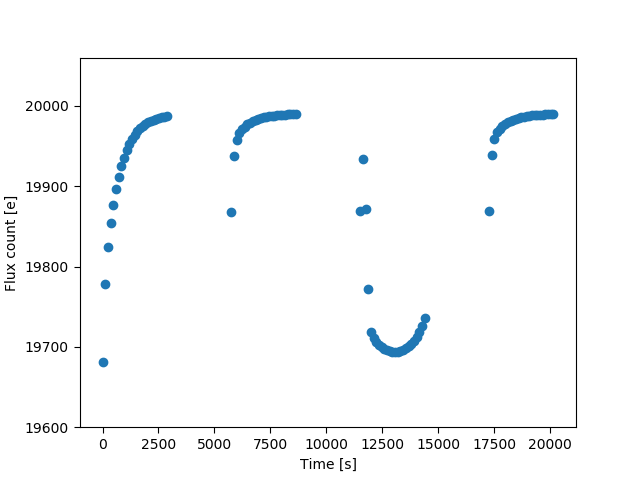

interactive(children=(FloatSlider(value=50.0, description='slow initial', max=500.0, step=50.0), FloatSlider(v…

In [7]:
from codes.ramp_demonstration2 import rampCorrectionPlot

trap_pop_s = widgets.FloatSlider(min=0, max=500, value=50, step=50, 
                           description='slow initial')
trap_pop_f = widgets.FloatSlider(min=0, max=100, value=10, step=10, 
                           description='fast initial')
dTrap_s = widgets.FloatSlider(min=0, max=500, value=0, step=50, 
                           description='slow extra')
dTrap_f = widgets.FloatSlider(min=0, max=100, value=0, step=10, 
                           description='fast extra')

plt.figure()
interactive_plot = interactive(rampCorrectionPlot,
                               trap_pop_s=trap_pop_s,
                               trap_pop_f=trap_pop_f,
                               dTrap_s=dTrap_s,
                               dTrap_f=dTrap_f,
                               continuous_update=False)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

In this task we will use the batman package to fit a transit to the lightcurve extracted from the direct images. You will fit the transit model to data before and after charge trap correction to understand the importance of systematics.

**Transit Spectrum**

End with the spectrum, final product
Explain out-of-transit spectra vs. in-transit spectrum
